In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/CMPE 593/datasets/processed_datasets/NTHU-DDD"

TRAIN_DIR = os.path.join(DATASET_PATH, "train")
VAL_DIR   = os.path.join(DATASET_PATH, "val")
TEST_DIR  = os.path.join(DATASET_PATH, "test")


In [ ]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    class_names=["notdrowsy", "drowsy"]
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False,
    class_names=["notdrowsy", "drowsy"]
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False,
    class_names=["notdrowsy", "drowsy"]
)


Found 46564 files belonging to 2 classes.
Found 9978 files belonging to 2 classes.
Found 9979 files belonging to 2 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


In [ ]:
def build_simple_cnn():
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(128, 128, 3)),

        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    return model


In [ ]:
model = build_simple_cnn()

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826,529 (3.15 MB)

 Trainable params: 826,529 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 5

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/5
728/728 ━━━━━━━━━━━━━━━━━━━━ 9159s 13s/step - accuracy: 0.7263 - loss: 0.5190 - val_accuracy: 0.8984 - val_loss: 0.2202
Epoch 2/5
728/728 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9109 - loss: 0.2002 - val_accuracy: 0.9227 - val_loss: 0.1637
Epoch 3/5
728/728 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9434 - loss: 0.1386 - val_accuracy: 0.9357 - val_loss: 0.1355
Epoch 4/5
728/728 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9548 - loss: 0.1126 - val_accuracy: 0.9435 - val_loss: 0.1190
Epoch 5/5
728/728 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9620 - loss: 0.0948 - val_accuracy: 0.9475 - val_loss: 0.1131


Plot Training Curves

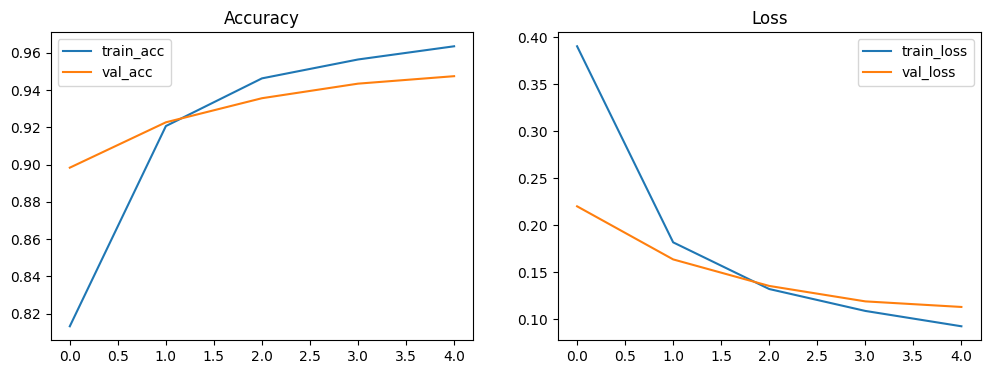

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()

plt.show()


Evaluate on Test Set

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

156/156 ━━━━━━━━━━━━━━━━━━━━ 971s 6s/step - accuracy: 0.9221 - loss: 0.1569
Test Accuracy: 0.9475899338722229


Save Model

In [ ]:
import joblib

In [ ]:
joblib.dump(model, os.path.join(DATASET_PATH, "baseline_cnn.pkl"))

['/content/drive/MyDrive/CMPE 593/datasets/processed_datasets/NTHU-DDD/baseline_cnn.pkl']